## 1. 사이킷런을 통해 학습,예측 데이터셋 나누기

In [1]:
#라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#전처리한 데이터셋 가져오기
df =pd.read_csv("./Data/diabetes_feature.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,206.0,5.332719,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,130.0,4.875197,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,206.0,5.332719,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


#### 1-1 학습과 예측에 사용할 데이터셋 만들기

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [4]:
X = df[[ 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Pregnancies_high',
        'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [5]:
y = df['Outcome']
y.shape

(768,)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [7]:
X_train.head()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,130.0,False
618,112,82,24,28.2,1.282,50,True,206.0,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,130.0,False
231,134,80,37,46.2,0.238,46,False,370.0,False


In [8]:
X_train.shape , X_test.shape

((614, 9), (154, 9))

In [9]:
y_train.shape, y_test.shape

((614,), (154,))

#### 1-2 랜덤값을 고정하여 Decision Tree 학습하고 예측하기

In [10]:
#모델 선택하기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model

DecisionTreeClassifier(random_state=42)

###### max_depth조절하기

In [11]:
#model = DecisionTreeClassifier(max_depth = 11,random_state = 42)
from sklearn.metrics import accuracy_score

for max_depth in range(3,12):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test,y_predict)*100
    print(max_depth, score)
#max_depth가 5일때 86으로 가장 성능이 좋음을 할 수 있따.

3 83.76623376623377
4 84.4155844155844
5 86.36363636363636
6 85.06493506493507
7 83.11688311688312
8 83.76623376623377
9 83.11688311688312
10 83.76623376623377
11 83.11688311688312


In [12]:
#모델 학습시키기
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [13]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [14]:
abs(y_predict - y_test).sum()

26

###### 정확도 계산하기

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)*100

83.11688311688312

#### 1-3 최적의 max_depth찾기

In [16]:
feature_names =X_train.columns.tolist()

feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

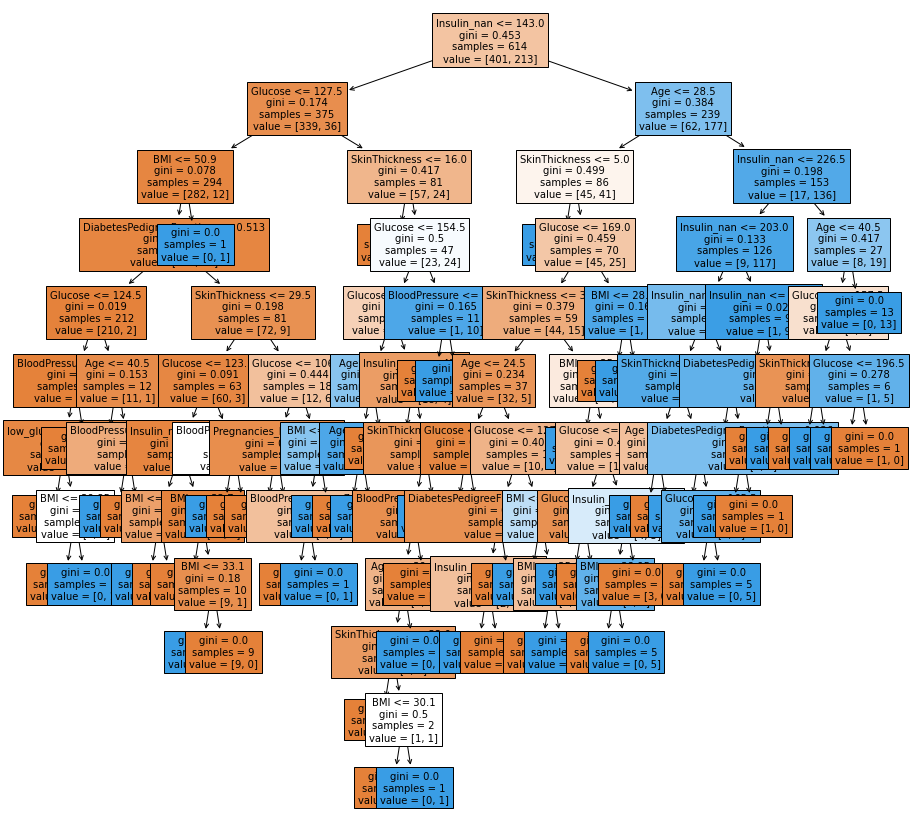

In [17]:
from sklearn.tree import plot_tree

#matplotlib.pyplot을 써줘야한다. matplotlib만 쓰면 안돼.
plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

#### 1.4 GridSearchCV를 사용해서 최적의 하이퍼 파라미터 값 찾기

In [18]:
from sklearn.model_selection import GridSearchCV

# https://www.inflearn.com/questions/97560 보고 해결함.
model = DecisionTreeClassifier(random_state = 42)
#어떤 파라미터를 조절할지 체크
param_grid = {"max_depth":range(3,12),
             "max_features":[0.3,0.5,0.7,0.9,1]}

clf = GridSearchCV(model, param_grid= param_grid, n_jobs =-1, cv= 5, verbose =2)
clf.fit(X_train,y_train)
#max_feature : 일부 featrue만 사용하고 싶을 때
#n_jobs는 -1로 설정하면 사용가능한 모든 장비를 학습에 이용
#cv는 cross validation을 5개로 나눈다.
#verbose =1 이면 로그를 찍는다. 0이면 로그를 출력하지 않는다.

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 210 out of 225 | elapsed:   12.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   12.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [19]:
#성능이 좋은 파라미터
clf.best_params_

{'max_depth': 7, 'max_features': 0.7}

In [20]:
#가장 좋은 성능을 내는 조합
clf.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=0.7, random_state=42)

In [21]:
#가장 좋은 점수
clf.best_score_

0.871398107423697

In [25]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.015336,0.001027,0.008249,0.001749,7,0.7,"{'max_depth': 7, 'max_features': 0.7}",0.829268,0.886179,0.869919,0.861789,0.909836,0.871398,0.026704,1
17,0.026859,0.005150,0.014850,0.006318,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.853659,0.894309,0.821138,0.821138,0.885246,0.855098,0.030838,2
23,0.017467,0.002392,0.007888,0.000766,7,0.9,"{'max_depth': 7, 'max_features': 0.9}",0.829268,0.894309,0.837398,0.829268,0.868852,0.851819,0.025770,3
12,0.022341,0.006871,0.007381,0.000800,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.804878,0.910569,0.829268,0.861789,0.852459,0.851793,0.035393,4
1,0.022100,0.002327,0.009185,0.002100,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.861789,0.886179,0.788618,0.845528,0.868852,0.850193,0.033439,5


In [26]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [27]:
#테스트 셋에서 더 낮은 점수가 나왔다.
clf.score(X_test,y_test)

0.8311688311688312

#### 1.5 RandomSearchCV를 사용해서 하이퍼 파라미터 값 찾기

    - Grid Search는 우리가 설정한 범위 안에서 파라미터를 탐색
    - Random Search는 좋은 성능을 낼 수 있는 랜덤값을 탐색
   

In [37]:
max_depth = np.random.randint(3,20,10)
max_depth

array([19, 13, 10,  6, 10, 15, 10,  7,  7, 10])

In [46]:
max_features =np.random.uniform(0.6,1.0,100)

In [47]:
param_distributions = {"max_depth":max_depth, 
                      "max_features":max_features}

In [48]:
from sklearn.model_selection import RandomizedSearchCV

clf =RandomizedSearchCV(model,
                        param_distributions,
                        n_iter =100,
                        scoring ="accuracy",
                        n_jobs =-1,
                        cv =5,
                        random_state =42)

clf.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([19, 13, 10,  6, 10, 15, 10,  7,  7, 10]),
                                        'max_features': array([0.99944072, 0.61962221, 0.66753895, 0.67676666, 0.99185688,
       0.71059777, 0.63800425, 0.84698644, 0.79295332, 0.99516378,
       0.67707165, 0.91157075, 0.79493385, 0.72246327, 0.61527144...
       0.78307773, 0.81257479, 0.74764985, 0.66550061, 0.67396939,
       0.94318652, 0.93773665, 0.74840626, 0.61859438, 0.99762624,
       0.71474771, 0.72448866, 0.6111872 , 0.86866099, 0.73221068,
       0.97652048, 0.66984993, 0.96598919, 0.85581295, 0.66590434,
       0.60360419, 0.90829313, 0.72216614, 0.82604033, 0.90057781,
       0.73953409, 0.70573648, 0.68902688, 0.79287632, 0.72480659])},
                   random_state=42, scoring='accuracy')

In [49]:
#가장 좋은 성능의 parameter 조합
clf.best_params_

{'max_features': 0.7248065857543979, 'max_depth': 7}

In [50]:
#가장 좋은 점수
clf.best_score_

0.871398107423697

In [51]:
#Grid와 비슷한 점수가 나왔따.
clf.score(X_test,y_test)

0.8311688311688312

## 2. 다양한 트리계열 머신러닝 모델 사용하기

#### 2-1. 랜덤포레스트 사용하기

In [93]:
#Random Forest는 샘플링하여 여러 데이터를 만든다.
# 이 샘플은 부트스트랩이라고 한다.

#먼저 비교를 위해 결정트리로 모델을 만든다.
#from sklearn.tree import DecisionTreeClassifier

#model = DecisionTreeClassifier(random_state =42)
#model

## 랜덤 포레스트
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators = 100,random_state= 42)
model

GradientBoostingClassifier(random_state=42)

#### 2.2 그라디언트 부스팅 알고리즘 사용하기

In [116]:
#boosting은 트리에 가중치를 부여한다.
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state =42)
model

GradientBoostingClassifier(random_state=42)

In [117]:
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [118]:
#결과를 예측한다.
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [119]:
#다르게 예측한 데이터들을 카운트하여 갯수를 센다.
# DT : 26
# RF : 22
# BS : 22
(y_predict != y_test).sum()

22

In [120]:
#정확도를 계산한다.
from sklearn.metrics import accuracy_score
#DF : 0.831
#RF : 0.857
#BS : 0.857 
accuracy_score(y_test,y_predict)

0.8571428571428571

    - 랜덤 포레스트는 여러개의 트리를 만들기 때문에 시각화가 어렵다

In [121]:
model.feature_importances_

array([0.11099012, 0.00776988, 0.10211075, 0.03584765, 0.02933404,
       0.09548332, 0.        , 0.61846424, 0.        ])

In [122]:
feature_names = X_train.columns.tolist()
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

<AxesSubplot:>

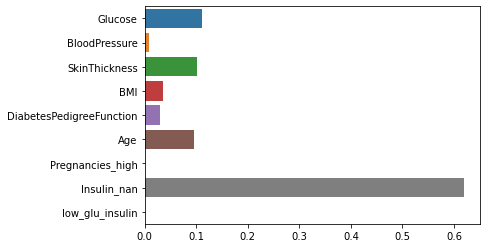

In [123]:
sns.barplot(x=model.feature_importances_,y =feature_names)